In [1]:
import unisacsi.Ocean as Oc
#import unisacsi.Meteo as Met
#from unisacsi.MET_model_download import download_MET_model_static_fields, download_MET_model_data
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import gsw
import cmocean as cmo
from scipy.io import loadmat
from scipy.interpolate import griddata

In [2]:
# path to cnv-files. Should be on the format Sta0001.cnv (Sta followed by four digits)
path_data = '/home/alsjur/PhD/Kurs/AGF-811/data/CTD/PolarsysselCTD/Adventfjorden/221103/'
#path_data = '/home/alsjur/PhD/Kurs/AGF-811/data/CTD/PolarsysselCTD/Adventfjorden/221031/'
path_figures = '/home/alsjur/PhD/Kurs/AGF-811/figures/'

In [3]:
# Read in files
CTD = Oc.read_CTD(path_data)

In [4]:
# Print list of stations
CTD.keys()

dict_keys(['A1', 'A2', 'A3', 'A7', 'A6', 'A5', 'A4', 'A8', 'A9', 'A10', 'A11', 'A14', 'A13', 'A12', 'A15'])

In [5]:
# Define section
advent_along = ['A15', 'A13', 'A9', '993','A2'][::-1]
advent_cross = ['322', '993', '323', '324']
isfjorden_cross = [f'{i}' for i in range(165, 172)][::-1]

In [7]:
advent2 = [f'A{i}' for i in range(1,16)]
advent2_along1 = ['A2', 'A5', 'A9', 'A13', 'A15']
advent2_cross1 = ['A4', 'A5', 'A6', 'A7']

In [15]:
# Which section to look at
section = advent2

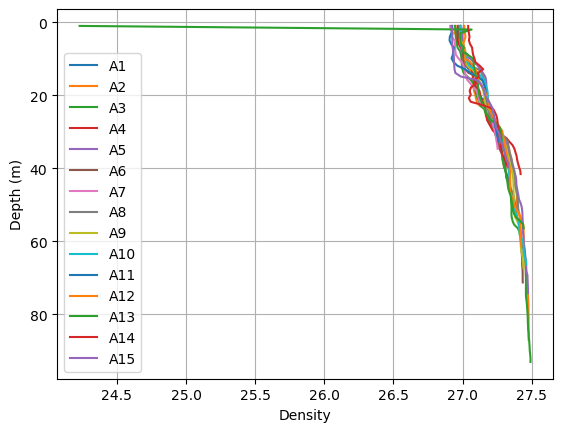

In [16]:
# Plot density profiles
fig, ax = plt.subplots()
for station in section:
    ax.plot(CTD[station]['SIGTH'],-CTD[station]['z'],label=station)
ax.invert_yaxis()
ax.set_xlabel('Density')
ax.set_ylabel('Depth (m)')
ax.grid()
ax.legend()

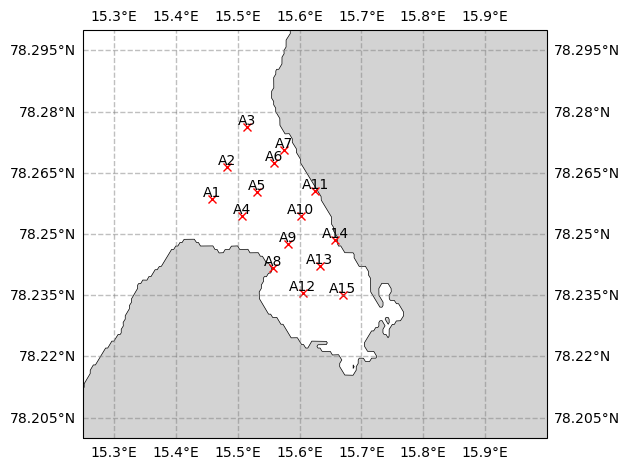

In [17]:
# Plot map off all stations
plt.figure()
Oc.plot_CTD_map(CTD, 
                #extent=[14.,17.5,78.2,78.9],
                #extent=[14.,16.,78.2,78.4],
                extent=[15.25,16.,78.2,78.3],
                #, topography="../data/bathymetry/bathymetry_svalbard.mat"
               )

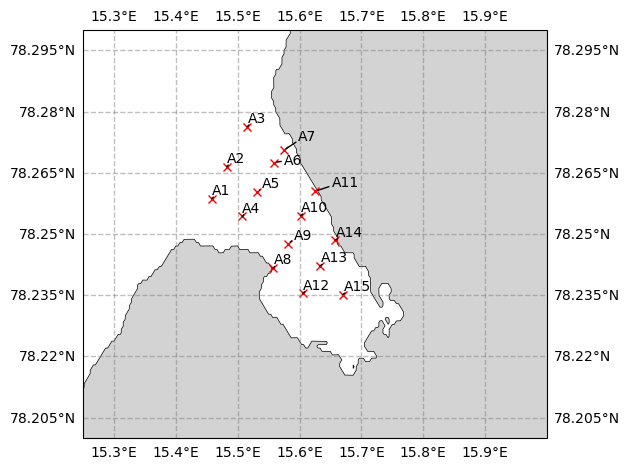

In [18]:
# Plot section
plt.figure()
Oc.plot_CTD_map(CTD, 
                #extent=[14.,16.,78.2,78.4], 
                extent=[15.25,16.,78.2,78.3],
                stations=section, 
                #topography="../data/bathymetry/bathymetry_svalbard.mat",
                adjust_text=True
               )
plt.savefig(path_figures+'cross_section_map.png')

In [19]:
# This step can be done to get the bottom bathymetry from bathymetry_svalbard.mat instead
''' 
# Interpolate bathymetry to sections
topo = loadmat("../data/bathymetry/bathymetry_svalbard.mat")
topo_lat,topo_lon,topo_z = topo['lat'],topo['lon'],topo['D']

section_lat = np.array([CTD[stat]["LAT"] for stat in section])
section_lon = np.array([CTD[stat]["LON"] for stat in section])

topo_section = griddata((topo["lon"].flatten(), topo["lat"].flatten()), topo["D"].flatten(), (section_lon, section_lat), method="linear")
'''

' \n# Interpolate bathymetry to sections\ntopo = loadmat("../data/bathymetry/bathymetry_svalbard.mat")\ntopo_lat,topo_lon,topo_z = topo[\'lat\'],topo[\'lon\'],topo[\'D\']\n\nsection_lat = np.array([CTD[stat]["LAT"] for stat in section])\nsection_lon = np.array([CTD[stat]["LON"] for stat in section])\n\ntopo_section = griddata((topo["lon"].flatten(), topo["lat"].flatten()), topo["D"].flatten(), (section_lon, section_lat), method="linear")\n'

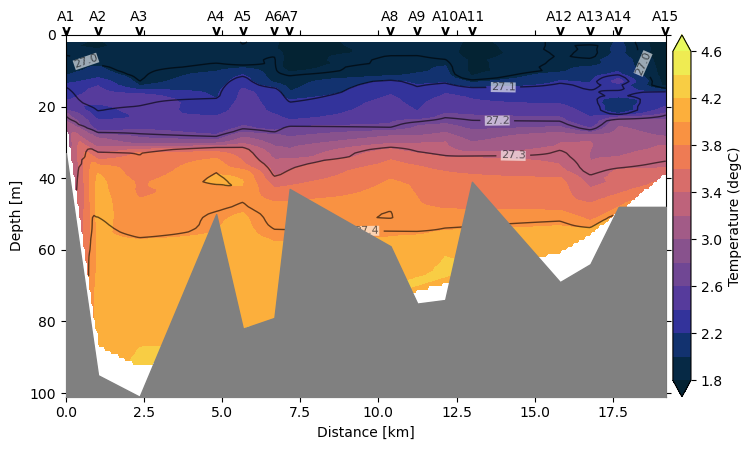

In [20]:
# Plot section temperature
Oc.plot_CTD_single_section(CTD, section, parameter='T',
                               clabel='Temperature (degC)',
                               #bottom=topo_section,
                              cmap='cmo.thermal',
                              clevels = np.arange(1.8,4.61,0.2)
                          )
                                

plt.savefig(path_figures+'cross_section_T_1.png')

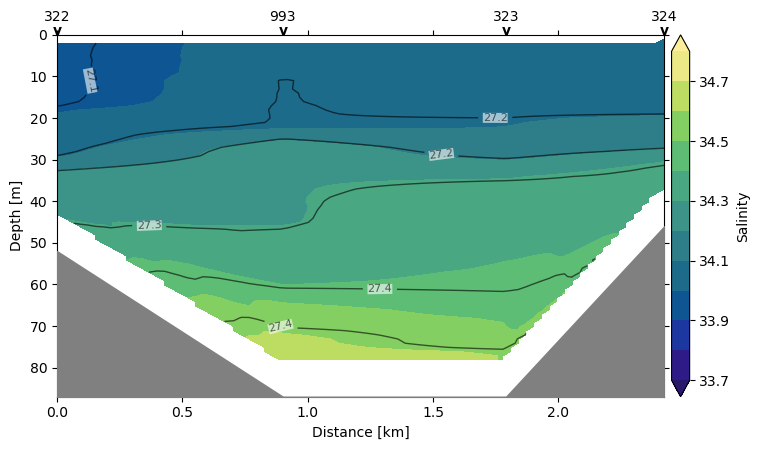

In [133]:
# Plot section salinity
Oc.plot_CTD_single_section(CTD, section, parameter='S',
                               clabel='Salinity',
                               #bottom=topo_section,
                              cmap='cmo.haline',
                               clevels = np.arange(33.7,34.81, 0.1)
                          )
plt.savefig(path_figures+'cross_section_S_1.png')

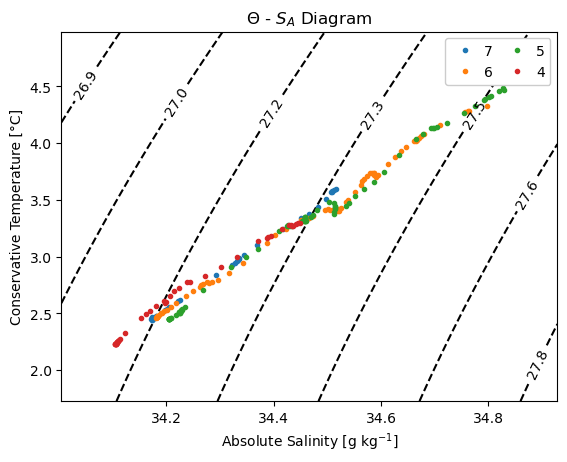

In [103]:
#Plot TS-diagram of section
plt.figure()
Oc.plot_CTD_ts(CTD, section)

In [16]:
help(Oc.plot_CTD_ts)

Help on function plot_CTD_ts in module unisacsi.Ocean:

plot_CTD_ts(CTD, stations=None, pref=0)
    Plots a TS diagram of selected stations from a CTD dataset.
    Parameters
    ----------
    CTD : dict
        Dictionary containing the CTD data.
    stations : array-like, optional
        The desired stations. The default is all stations in CTD.
    pref : TYPE, optional
        Which reference pressure to use. The following options exist:
    
        0:    0 dbar
    
        1: 1000 dbar
    
        2: 2000 dbar
    
        3: 3000 dbar
    
        4: 4000 dbar
    
        The default is 0.
    Returns
    -------
    None.



(1.0, 5.0)

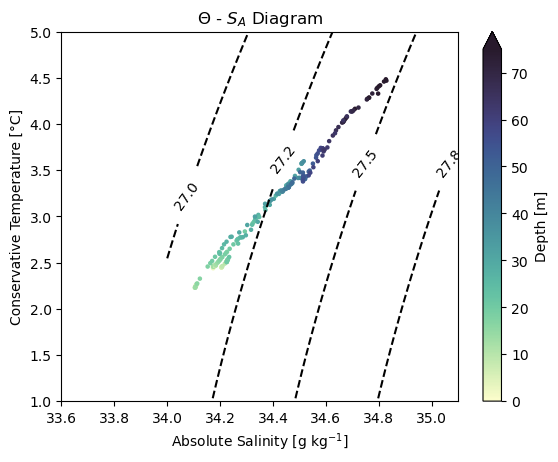

In [105]:
#Plot TS-diagram of section, with the possibility to adjust the plot
fig, ax = plt.subplots()
Oc.create_empty_ts(T_extent=[-2., 5.],S_extent=[34.,35.5])
for station in section:
    S = ax.scatter(CTD[station]['SA'],CTD[station]['CT'],
                s=5,
                   cmap='cmo.deep', 
                   #cmap = 'Blues',
                   c=-CTD[station]['z'],
                   vmin = 0,
                   vmax = 75,
                  
                  )

fig.colorbar(S,label='Depth [m]', extend='max')
# Cold freshwater, rivers 
#ax.plot([0,34.8],[0,4.5])

# Gade line
#ax.plot([0,35],[-90,4.5])

ax.set_xlim([33.6,35.1])
ax.set_ylim([1,5])
#ax.set_ylim([-90,5])
#ax.set_xlim([0,35.1])
#plt.savefig(path_figures+'TS_2.png')